**Cohort Analysis for Assessing Customer Retention in the E-commerce Industry**

In [1]:
#import libraries for preproccessing and Data visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import collections as counter #counting 

In [3]:
#load the data set 
df=pd.read_csvdf = pd.read_csv('ShopSphere_Dataset.csv')


START DATA EXPLORATORY 

In [4]:
#PRINT THE DATASET INFO
df.head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States
5,400000,2024-01-21 03:01:47,10000,40787,Automotive,6,114.25,United Kingdom
6,400000,2024-01-21 03:01:47,10000,40156,Electronics,18,270.07,United Kingdom
7,400000,2024-01-21 03:01:47,10000,40149,Electronics,1,120.80,United Kingdom
8,400000,2024-01-21 03:01:47,10000,40128,Electronics,1,147.43,United States
9,400000,2024-01-21 03:01:47,10000,40088,Electronics,60,112.11,United States


In [5]:
df.tail(10) #this gives the top 10 rows 

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
385304,420989,2024-10-11 09:01:10,14371,40097,Electronics,40,83.85,United States
385305,420989,2024-10-11 09:01:10,14371,40537,Sports & Outdoors,56,40.76,United Kingdom
385306,420989,2024-10-11 09:01:10,14371,40050,Fashion,46,39.29,United States
385307,420989,2024-10-11 09:01:10,14371,40231,Home & Living,84,64.28,United States
385308,420989,2024-10-11 09:01:10,14371,40608,Groceries,11,6.88,United States
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States


In [6]:
#Dimensionality of the data by getting the number of rows and columns in the dataset 
df.shape

(385314, 8)

In [7]:
#Examine the columns/features of the dataset
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country'],
      dtype='object')

In [8]:
#Investigate the dataset for annomalies and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    385314 non-null  int64  
 1   InvoiceDate  385314 non-null  object 
 2   CustomerID   385314 non-null  int64  
 3   StockCode    385314 non-null  int64  
 4   Description  385314 non-null  object 
 5   Quantity     385314 non-null  int64  
 6   UnitPrice    385314 non-null  float64
 7   Country      385314 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 23.5+ MB


In [9]:
#Numerical statistical Analysis
df.describe()

,InvoiceNo,CustomerID,StockCode,Quantity,UnitPrice
count,385314.000000,385314.000000,385314.000000,385314.000000,385314.000000
mean,410481.180074,12178.170819,40339.113494,50.503283,46.416868
std,6066.054690,1264.763846,239.679387,26.674684,41.658811
min,400000.000000,10000.000000,40000.000000,1.000000,1.000000
25%,405223.000000,11078.000000,40127.000000,31.000000,16.370000
50%,410453.000000,12151.000000,40288.000000,51.000000,33.590000
75%,415747.000000,13285.000000,40559.000000,70.000000,62.310000
max,420989.000000,14371.000000,40799.000000,100.000000,384.900000


In [10]:
# Categorical statistical Analysis
df.describe(include=["object","bool"])

,InvoiceDate,Description,Country
count,385314,385314,385314
unique,20980,10,2
top,2024-08-20 21:04:36,Fashion,United States
freq,50,69110,308618


**Dealing with missing data -**

1, MCAR (Missing completely at random): These are values that are randomly missing and do not depend on any other values.
2. MAR (Missing at random): These values are dependent on some additional features.
3. MNAR (Missing not at random): There is a reason behind why these values are missing.

There are several methods forimputing missing data, including the measure of Central Tendency, regression Imputation, and multiple imputation. measure of Central Tendency involves replacing missing values with either the Mean, Median and Mode of the varlable, while regression imputation Involves using other variables in the dataset to predict missing values

In [11]:
#investigate if there is a missing data
null_vals = df.isnull().sum()
null_vals

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

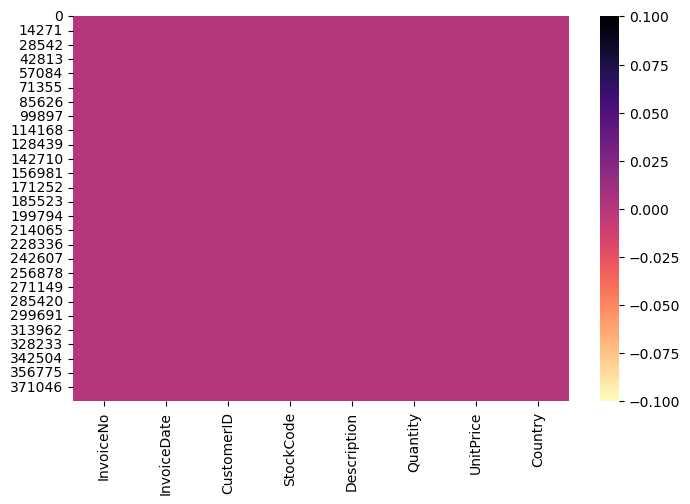

In [12]:
#Visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(),cbar=True, cmap="magma_r");

We can tell from above no missing data 

In [13]:
#To get the exact row if there is a missing bracket 
#Display where there are missing data 
df[df.isnull().any(axis=1)]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country


The above further confirms that there are no rows with any missing data 


In [14]:
#datatime Analysis
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States


Looking at the info Data we can see that the invoiceDate is seen as an object by python.So what we need to do is convert it to a pandas datetime.This enables you to easily perform date filtering, extract month/year, and do time-based analysis.

In [15]:
#convert the date column into a pandas datetime object
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    385314 non-null  int64         
 1   InvoiceDate  385314 non-null  datetime64[ns]
 2   CustomerID   385314 non-null  int64         
 3   StockCode    385314 non-null  int64         
 4   Description  385314 non-null  object        
 5   Quantity     385314 non-null  int64         
 6   UnitPrice    385314 non-null  float64       
 7   Country      385314 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 23.5+ MB


In [16]:
#Extract the Year,Month and Quarter.Here create new columns for Year, month and Quarter
df['year']=df["InvoiceDate"].dt.year
df['month']=df["InvoiceDate"].dt.month
df['month_name']=df["InvoiceDate"].dt.month_name()
df['quarter']=df["InvoiceDate"].dt.quarter

df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month,month_name,quarter
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,2024,1,January,1
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,2024,1,January,1
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,2024,1,January,1
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,2024,1,January,1
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,2024,1,January,1


In [17]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month,month_name,quarter
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,2024,10,October,4
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2024,10,October,4
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,2024,10,October,4
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,2024,10,October,4
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2024,10,October,4


EXPLORATORY DATA ANANLYSIS

Here, I proceeded to Group the purchases made by country.Grouping by country is very important for an online shopping company because it provides insights that directly impact business strategy, marketing, inventory, and growth. it also helps with Focus marketing, promotions, or product expansion on high-performing countries.If a certain country is performing more we can also look at patterns on the purchases and customers pattern of buying.

In [18]:
# Create a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [19]:
#Read the dataframe to now see the new Revenue column added
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month,month_name,quarter,Revenue
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,2024,1,January,1,172.36
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,2024,1,January,1,488.04
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,2024,1,January,1,7183.68
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,2024,1,January,1,268.10
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,2024,1,January,1,30.64


In [20]:
# Group by country and sum revenue
# Convert to DataFrame
country_sales = df.groupby('Country')['Revenue'].sum()

# Sort countries by revenue in descending order
country_sales = country_sales.sort_values(ascending=False)

# Convert to a DataFrame if needed
country_sales = country_sales.reset_index()

print(country_sales)


          Country       Revenue
0   United States  7.221615e+08
1  United Kingdom  1.801644e+08


In [21]:
# Group by country and sum revenue
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Convert to DataFrame
country_sales = country_sales.reset_index()

# Rename column for clarity
country_sales.rename(columns={'Revenue': 'Total Revenue'}, inplace=True)

# Format numbers with commas and 2 decimals
country_sales['Total Revenue'] = country_sales['Total Revenue'].apply(lambda x: f"{x:,.2f}")

print("Total Revenue by Country ")
print(country_sales)


Total Revenue by Country 
          Country   Total Revenue
0   United States  722,161,459.39
1  United Kingdom  180,164,360.98


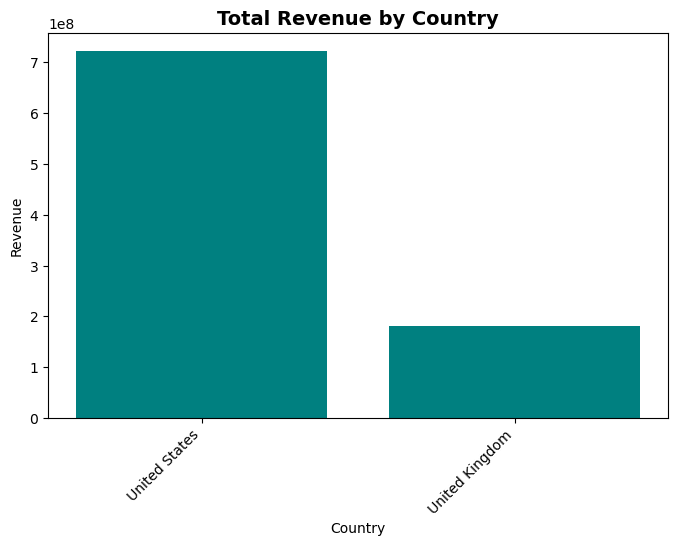

In [22]:
#Visualising the report above using matplolib 

# Convert 'Total Revenue' back to float for plotting
country_sales['Total Revenue_float'] = country_sales['Total Revenue'].str.replace(',', '').astype(float)

# Create bar chart
plt.figure(figsize=(8,5))
plt.bar(country_sales['Country'], country_sales['Total Revenue_float'], color='Teal')
plt.title('Total Revenue by Country',fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')  # rotate country names for readability

plt.show()


In [23]:
# Calculate percentage of total revenue
total_rev = country_sales['Total Revenue_float'].sum()
country_sales['Revenue %'] = (country_sales['Total Revenue_float'] / total_rev * 100).round(2)

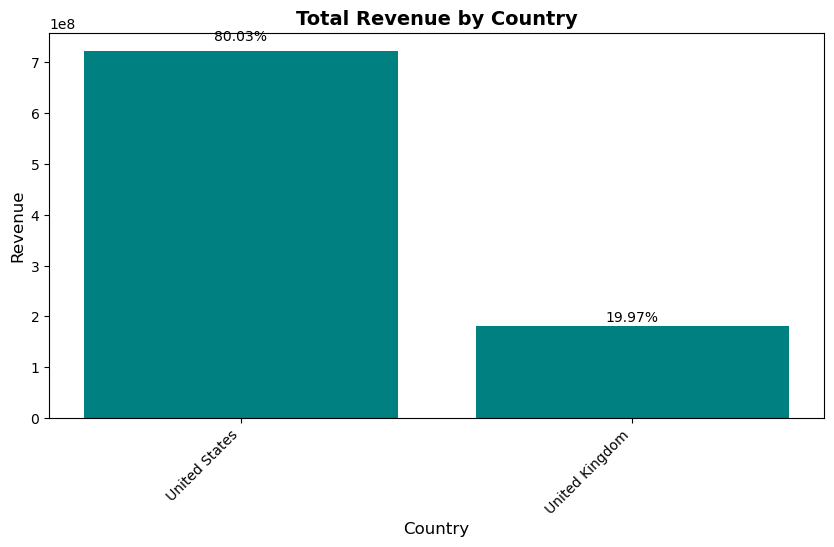

In [24]:
plt.figure(figsize=(10,5))
bars = plt.bar(country_sales['Country'], country_sales['Total Revenue_float'], color='teal')

plt.title('Total Revenue by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar, perc in zip(bars, country_sales['Revenue %']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, f'{perc}%', ha='center', va='bottom', fontsize=10)


plt.show()

In [25]:
#Checking threads of major KPIS
total_revenue = df['Revenue'].sum()
total_quantity = df['Quantity'].sum()
unique_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
avg_order_value = total_revenue / num_transactions

print("BASIC KEY PERFORMING INDEX")
print(f"Total Revenue:   {total_revenue:,.2f}")
print(f"Total Quantity Sold:   {total_quantity:,}")
print(f"Unique Customers:   {unique_customers}")
print(f"Number of Transactions:   {num_transactions}")
print(f"Average Order Value:   {avg_order_value:,.2f}")

BASIC KEY PERFORMING INDEX
Total Revenue:   902,325,820.37
Total Quantity Sold:   19,459,622
Unique Customers:   4372
Number of Transactions:   20990
Average Order Value:   42,988.37


**Customer Who Spent the Most**
Knowing the customer who spent the most tells the business who drives revenue, how to retain them, and how to tailor strategies for growth.

In [26]:
# Group by CustomerID and sum their revenue
customer_revenue = df.groupby('CustomerID')['Revenue'].sum()

# Find the customer who spent the most
top_spender = customer_revenue.idxmax()
top_spender_amount = customer_revenue.max()

print(f"Customer who spent the most: {top_spender} ({top_spender_amount:,.2f})")


Customer who spent the most: 11068 (1,235,162.66)


Identifyig the Top product categories :Identifying Top Product Categories shows what drives revenue, guides inventory & marketing decisions, and helps strategically grow the business.

**Getting the Top 10 spender**

In [27]:
# Group by CustomerID and sum their revenue
customer_revenue = df.groupby('CustomerID')['Revenue'].sum()

# Sort the customers by revenue in descending order and take the top 10
top_10_spenders = customer_revenue.sort_values(ascending=False).head(10)

print("Top 10 Customers by Revenue Generated for the Business")
print(top_10_spenders)


Top 10 Customers by Revenue Generated for the Business
CustomerID
11068    1235162.66
13261    1039853.02
10431    1030023.71
10764     877139.59
11703     874169.93
14183     861571.87
12933     842562.54
13997     826101.16
10458     807760.70
10194     783443.99
Name: Revenue, dtype: float64


**Analysing what Category the 10 spenders bought from the most **

In [28]:

#  Get the top 10 spenders
top_10_spenders = customer_revenue.sort_values(ascending=False).head(10)
top_10_ids = top_10_spenders.index.tolist()  # List of CustomerIDs

# Filter dataset for these top 10 customers
top_customers_data = df[df['CustomerID'].isin(top_10_ids)]

# Group by CustomerID and Description to see products/categories they bought
product_per_customer = top_customers_data.groupby(['CustomerID', 'Description'])['Revenue'].sum().unstack(fill_value=0)
print("\nRevenue by Product/Category for Top 10 Customers:")
print(product_per_customer)




Revenue by Product/Category for Top 10 Customers:
Description  Automotive  Beauty & Wellness     Books  Electronics    Fashion  \
CustomerID                                                                     
10194         126217.80           44118.69  17043.11    239872.23   92766.74   
10431          91421.11           42009.06  23341.57    438029.81  146319.97   
10458          97247.62           27100.67  19040.55    309475.88  116814.47   
10764         130361.64           44922.48  13042.81    318739.78   97530.03   
11068         188467.03           69013.96  19577.05    341556.83  220855.20   
11703         132839.95           45147.55  20665.45    256275.85  147693.74   
12933         126061.77           42753.70   7053.03    272675.75  120524.48   
13261         110433.77           40040.96  33584.79    391640.90  133081.61   
13997         147698.68           57193.51  18757.76    249772.08  118449.28   
14183          92437.08           40007.53  20388.89    275957.86  14

Grouping by CustomerID and product/category as above turns transactional data into actionable insights, allowing you to:

Personalize recommendations,Send targeted offers,Increase loyalty and repeat purchases,Identify upselling/cross-selling opportunities

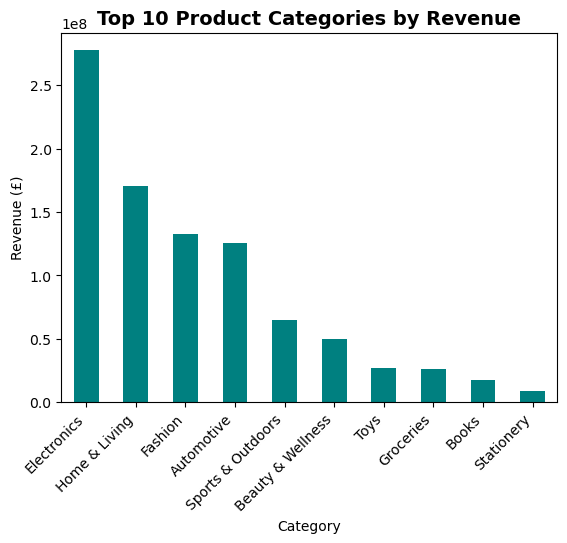

In [29]:
#Top Product Categories in terms of Revenue Generated.
category_sales = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
category_sales.plot(kind='bar', color='teal')
plt.title('Top 10 Product Categories by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45, ha='right')

plt.show()


Above, we are able to see what products generates the most revenue for the Shopsphere.This matters because some customers might buy less frequently, but their purchases are high-value (high-revenue) and a sign of premium loyalty. Identifying these products helps focus retention strategies on high-spend repeat customers. 

**Most Frequently Bought Products.This is in terms of popularity not the amount generated.**

In [30]:
df['Description'].value_counts().head(5)


Description
Fashion              69110
Home & Living        53811
Electronics          46211
Groceries            42163
Beauty & Wellness    38595
Name: count, dtype: int64

Even though the analysis result above is focused on products ,they tell  stories that help assess retention.It tells which products or categories are most frequently purchased across transactions, Helps to identify "staple" products that drive repeat engagement and also frequent items indicate high customer familiarity often what brings customers back.

Fashion items and Electronics appear most frequently in the transactions.

**Total customers and repeat buyers**

In [32]:
# Total unique customers
total_customers = df['CustomerID'].nunique()

# Orders per customer
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Repeat customers .Customers who made more than one order
repeat_customers = (orders_per_customer > 1).sum()

print(f"Total customers: {total_customers}")
print(f"Repeat customers: {repeat_customers} ({repeat_customers/total_customers:.2%})")

print(f"Average Orders per Customer: {orders_per_customer.mean():.2f}")


Total customers: 4372
Repeat customers: 3716 (85.00%)
Average Orders per Customer: 4.80


So Out of 4372 customers, 3716 (85%) made more than one purchase .This indicates that tye retention is above moderate. Average orders per customer = 4.80

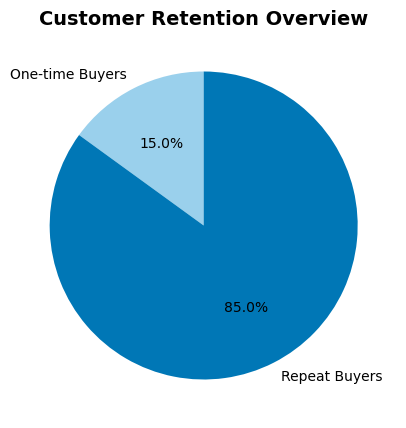

In [33]:
##Data vsualization
labels = ['One-time Buyers', 'Repeat Buyers']
sizes = [total_customers - repeat_customers, repeat_customers]
colors = ['#9AD0EC', '#0077B6']

plt.figure(figsize=(8,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Customer Retention Overview', fontsize=14, fontweight='bold')
plt.show()

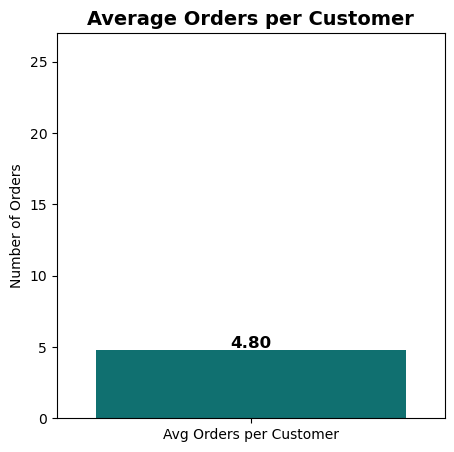

In [34]:
import seaborn as sns

avg_orders = orders_per_customer.mean()

plt.figure(figsize=(5,5))
sns.barplot(x=['Avg Orders per Customer'], y=[avg_orders], color='teal')
plt.title('Average Orders per Customer', fontsize=14, fontweight='bold')
plt.ylabel('Number of Orders')
plt.ylim(0, orders_per_customer.max() + 1)
plt.text(0, avg_orders + 0.1, f'{avg_orders:.2f}', ha='center', fontsize=12, fontweight='bold', color='black')
plt.show()


On average, each customer places 4.80 orders.The majority are one-time buyers, suggesting an opportunity to improve repeat purchase behavior through campaigns that make them want to come back.

**COHORT ANALYSIS**
Cohort analysis is extremely useful in data science because it helps uncover how different groups of users or entities behave over time, rather than just looking at overall averages.

In this project our Cohort will be the month of First purchase ie everybody that there first purcahse is within a period will be a cohort of that month.This can be gotten from the Invoice date 

In [35]:
df['InvoiceMonth']=df['InvoiceDate'].dt.to_period('M')

In [36]:
df = df.drop(columns=['month'])


In [37]:
cohort_data=df.groupby('CustomerID')['InvoiceMonth'].min()
cohort_data.name='CohortMonth'  #CohortMonth is the first time the person made a purchase.

In [38]:
df=df.merge(cohort_data, on='CustomerID')

In [39]:
df.head(20)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month_name,quarter,Revenue,InvoiceMonth,CohortMonth
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,2024,January,1,172.36,2024-01,2024-01
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,2024,January,1,488.04,2024-01,2024-01
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,2024,January,1,7183.68,2024-01,2024-01
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,2024,January,1,268.10,2024-01,2024-01
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,2024,January,1,30.64,2024-01,2024-01
5,400000,2024-01-21 03:01:47,10000,40787,Automotive,6,114.25,United Kingdom,2024,January,1,685.50,2024-01,2024-01
6,400000,2024-01-21 03:01:47,10000,40156,Electronics,18,270.07,United Kingdom,2024,January,1,4861.26,2024-01,2024-01
7,400000,2024-01-21 03:01:47,10000,40149,Electronics,1,120.80,United Kingdom,2024,January,1,120.80,2024-01,2024-01
8,400000,2024-01-21 03:01:47,10000,40128,Electronics,1,147.43,United States,2024,January,1,147.43,2024-01,2024-01
9,400000,2024-01-21 03:01:47,10000,40088,Electronics,60,112.11,United States,2024,January,1,6726.60,2024-01,2024-01


In [40]:
df.tail(20)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month_name,quarter,Revenue,InvoiceMonth,CohortMonth
385294,420988,2024-09-13 20:45:34,14371,40040,Fashion,25,45.26,United Kingdom,2024,September,3,1131.50,2024-09,2024-05
385295,420989,2024-10-11 09:01:10,14371,40178,Home & Living,52,51.52,United States,2024,October,4,2679.04,2024-10,2024-05
385296,420989,2024-10-11 09:01:10,14371,40480,Sports & Outdoors,66,33.39,United States,2024,October,4,2203.74,2024-10,2024-05
385297,420989,2024-10-11 09:01:10,14371,40047,Fashion,91,57.54,United States,2024,October,4,5236.14,2024-10,2024-05
385298,420989,2024-10-11 09:01:10,14371,40420,Toys,17,30.03,United Kingdom,2024,October,4,510.51,2024-10,2024-05
385299,420989,2024-10-11 09:01:10,14371,40402,Toys,59,16.70,United States,2024,October,4,985.30,2024-10,2024-05
385300,420989,2024-10-11 09:01:10,14371,40294,Beauty & Wellness,69,30.04,United States,2024,October,4,2072.76,2024-10,2024-05
385301,420989,2024-10-11 09:01:10,14371,40090,Electronics,100,138.66,United States,2024,October,4,13866.00,2024-10,2024-05
385302,420989,2024-10-11 09:01:10,14371,40209,Home & Living,50,200.50,United States,2024,October,4,10025.00,2024-10,2024-05
385303,420989,2024-10-11 09:01:10,14371,40311,Beauty & Wellness,54,21.03,United Kingdom,2024,October,4,1135.62,2024-10,2024-05


In [41]:
invoice_year = df['InvoiceMonth'].dt.year
invoice_month = df['InvoiceMonth'].dt.month

cohort_year = df['CohortMonth'].dt.year
cohort_month = df['CohortMonth'].dt.month

#trying to extract both the year and month from two datetime columns (InvoiceMonth and CohortMonth)

In [42]:
year_diff=invoice_year -cohort_year
month_diff=invoice_month-cohort_month

In [43]:
df['CohortIndex']=year_diff*12 +month_diff + 1    #The Cohort Index represents the number of months since the customer’s first purchase (cohort month).

In [44]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month_name,quarter,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,2024,January,1,172.36,2024-01,2024-01,1
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,2024,January,1,488.04,2024-01,2024-01,1
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,2024,January,1,7183.68,2024-01,2024-01,1
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,2024,January,1,268.10,2024-01,2024-01,1
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,2024,January,1,30.64,2024-01,2024-01,1


In [45]:
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,year,month_name,quarter,Revenue,InvoiceMonth,CohortMonth,CohortIndex
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,2024,October,4,705.95,2024-10,2024-05,6
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2024,October,4,2014.74,2024-10,2024-05,6
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,2024,October,4,1513.92,2024-10,2024-05,6
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,2024,October,4,3994.00,2024-10,2024-05,6
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2024,October,4,2325.44,2024-10,2024-05,6


In [46]:
df = df.drop(columns=['year', 'month_name', 'quarter'])


In [47]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024-01,2024-01,1
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024-01,2024-01,1
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024-01,2024-01,1
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024-01,2024-01,1
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024-01,2024-01,1


In [48]:
#spreading the customers according to cohortMonth and cohortIndex

cohort_counts = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().reset_index()

The above code is “For each cohort (the group of customers who started in the same month), how many unique customers were active in each subsequent month?

In [49]:
cohort_pivot = cohort_counts.pivot(index='CohortMonth' ,columns = 'CohortIndex' ,values='CustomerID')
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,344.0,79.0,73.0,97.0,90.0,90.0,95.0,100.0,96.0,118.0,94.0,138.0,83.0
2024-01,329.0,78.0,94.0,93.0,76.0,92.0,88.0,84.0,90.0,101.0,87.0,131.0,NaN
2024-02,337.0,86.0,95.0,94.0,83.0,96.0,82.0,99.0,94.0,109.0,106.0,NaN,NaN
2024-03,334.0,73.0,86.0,99.0,91.0,98.0,88.0,95.0,106.0,98.0,NaN,NaN,NaN
2024-04,334.0,101.0,86.0,92.0,96.0,103.0,93.0,92.0,91.0,NaN,NaN,NaN,NaN
2024-05,349.0,91.0,81.0,94.0,103.0,102.0,109.0,90.0,NaN,NaN,NaN,NaN,NaN
2024-06,312.0,76.0,74.0,80.0,82.0,98.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,347.0,107.0,82.0,89.0,98.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,335.0,81.0,80.0,92.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
cohort_size = cohort_pivot .iloc[:,0]
retention = cohort_pivot.divide(cohort_size , axis = 0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,1.0,0.230,0.212,0.282,0.262,0.262,0.276,0.291,0.279,0.343,0.273,0.401,0.241
2024-01,1.0,0.237,0.286,0.283,0.231,0.280,0.267,0.255,0.274,0.307,0.264,0.398,NaN
2024-02,1.0,0.255,0.282,0.279,0.246,0.285,0.243,0.294,0.279,0.323,0.315,NaN,NaN
2024-03,1.0,0.219,0.257,0.296,0.272,0.293,0.263,0.284,0.317,0.293,NaN,NaN,NaN
2024-04,1.0,0.302,0.257,0.275,0.287,0.308,0.278,0.275,0.272,NaN,NaN,NaN,NaN
2024-05,1.0,0.261,0.232,0.269,0.295,0.292,0.312,0.258,NaN,NaN,NaN,NaN,NaN
2024-06,1.0,0.244,0.237,0.256,0.263,0.314,0.276,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,1.0,0.308,0.236,0.256,0.282,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,1.0,0.242,0.239,0.275,0.278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above, This table shows what percentage of users from each cohort stayed active over time. The first column (1) is always 1.0 (100%), because it’s the starting point.The next columns (2, 3, …) show retention after 1 month, 2 months, etc.You can easily see whether retention improves or declines across cohorts

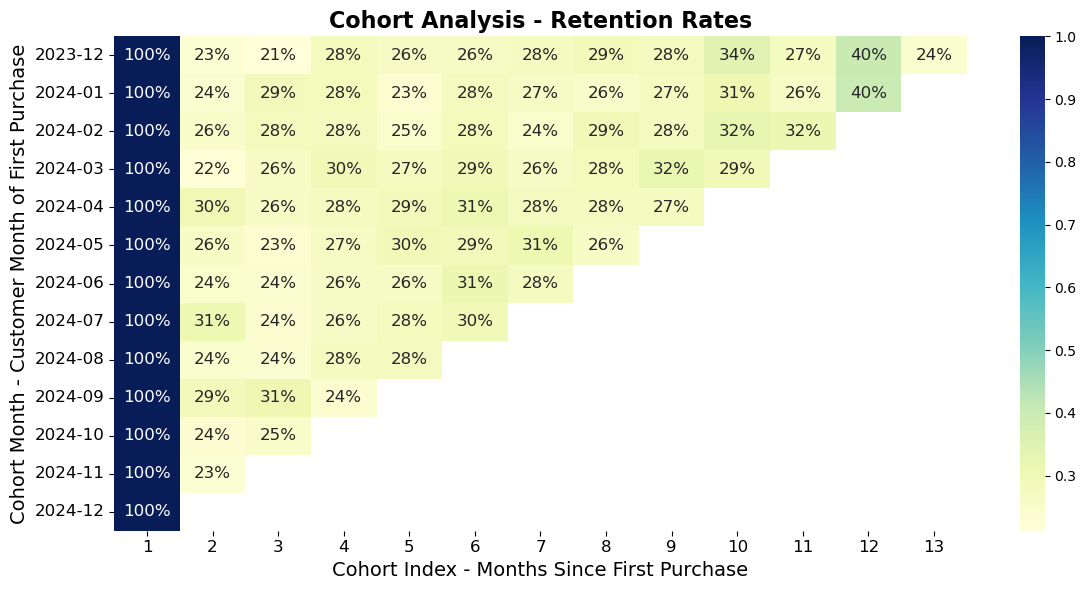

In [52]:
plt.figure(figsize=(12, 6))

# Heatmap with annotations
sns.heatmap(
    retention,
    annot=True,            # show retention values in cells
    fmt='.0%',             # format as percentage
    cmap='YlGnBu',         # corrected colormap
    annot_kws={'size': 12} # font size for cell annotations
)

# Titles and axis labels with font size
plt.title('Cohort Analysis - Retention Rates', fontsize=16, fontweight='bold')
plt.xlabel('Cohort Index - Months Since First Purchase', fontsize=14)
plt.ylabel('Cohort Month - Customer Month of First Purchase', fontsize=14)

# Tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [55]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [56]:
reference_date

Timestamp('2025-01-01 23:52:56')

**Using the RFM metrics**, a common way to understand customer behavior:
R (Recency)	How recently the customer made a purchase	The number of days since their last purchase (based on reference_date)
F (Frequency)	How often the customer made purchases	Counts how many unique invoices they have
M (Monetary)	How much money they’ve spent	Sums up all their revenue

In [57]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': pd.Series.nunique,                                   # Frequency
    'Revenue': 'sum'                                          # Monetary
}).reset_index()

    

In [58]:
rfm.columns=['CustomerID', 'recency_days','frequency','monetary']

In [59]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,10000,140,5,242993.87
1,10001,86,1,20841.75
2,10002,23,6,254693.19
3,10003,89,2,115314.08
4,10004,100,7,305794.35


Next, we want to prepare the RFM data for machine learning or clustering (usually to group customers into segments.The StandardScalar rescales all features so they’re roughly on the same scale.Mean = 0
Standard deviation = 1

In [60]:
from sklearn.preprocessing import StandardScaler

X = rfm[['recency_days', 'frequency', 'monetary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
X_scaled

array([[ 1.07915363,  0.06017119,  0.25019975],
       [ 0.26375028, -1.14933883, -1.26817781],
       [-0.68755362,  0.36254869,  0.33016291],
       ...,
       [-0.37045232, -1.14933883, -1.05706758],
       [-0.86875437,  1.57205871,  1.76664742],
       [ 0.20335003,  0.06017119,  0.20268637]])

Using Clustering to segment the customers.K-Means is a machine learning algorithm that automatically groups similar customers together based on their RFM values (recency, frequency, monetary)

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
inertia = []
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

What we did is, we have to find the best number of clusters (K) for K-Means
Here, we are trying different numbers of customer groups (2, 3, 4 … 10) and keeping track of two things for each:
How compact the groups are (inertia),
How clearly separated the groups are (silhouette score).
Then, these numbers to decide the “best” number of customer segments.

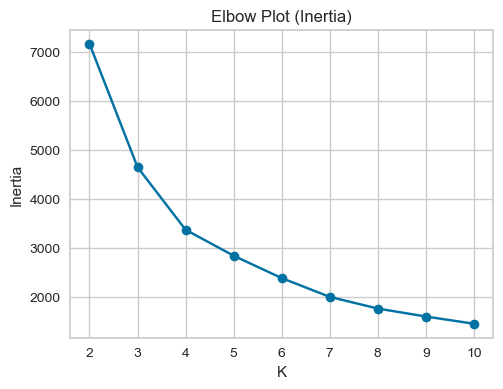

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot (Inertia)')
plt.ylabel('Inertia')
plt.xlabel('K')
plt.show()

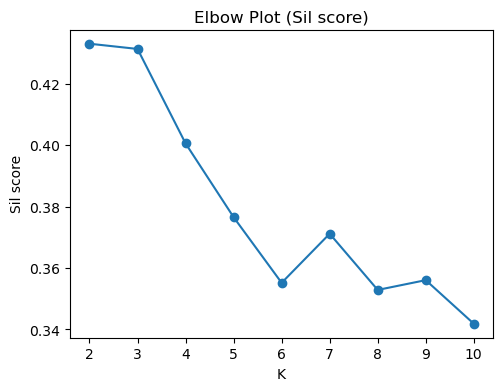

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range, sil_scores, marker='o')
plt.title('Elbow Plot (Sil score)')
plt.ylabel('Sil score')
plt.xlabel('K')
plt.show()

In [65]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Using yellowbrick cluster module helps specifically for clustering problems like K-Means While KElbowVisualizer This is a ready-made tool that helps you find the “best” number of clusters (K) automatically

In [68]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

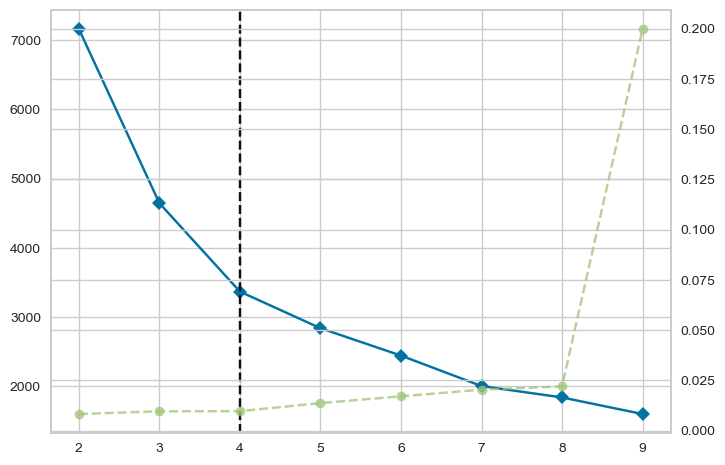

In [69]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)

In [71]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [72]:
rfm['Clusters'] = kmeans.labels_
rfm.head()

,CustomerID,recency_days,frequency,monetary,Clusters
0,10000,140,5,242993.87,2
1,10001,86,1,20841.75,1
2,10002,23,6,254693.19,0
3,10003,89,2,115314.08,1
4,10004,100,7,305794.35,0


In [73]:
cluster_profile = rfm.groupby('Clusters').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

In [74]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
Clusters,,,,
0,47.1,6.3,269730.0,1367
1,45.0,2.4,99169.9,1733
2,186.8,2.9,125700.8,719
3,41.5,11.2,490713.6,553


In [75]:
cluster_names = {
    3: 'V-VIPs',
    0: 'VIPs',
    1: 'Loyal Regulars',
    2: 'At Risk / Lost'
}

In [76]:
cluster_profile['Segment'] = cluster_profile.index.map(cluster_names)

In [77]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers,Segment
Clusters,,,,,
0,47.1,6.3,269730.0,1367,VIPs
1,45.0,2.4,99169.9,1733,Loyal Regulars
2,186.8,2.9,125700.8,719,At Risk / Lost
3,41.5,11.2,490713.6,553,V-VIPs


In [78]:
cluster_profile.columns

Index(['recency_days', 'frequency', 'monetary', 'NumCustomers', 'Segment'], dtype='object')

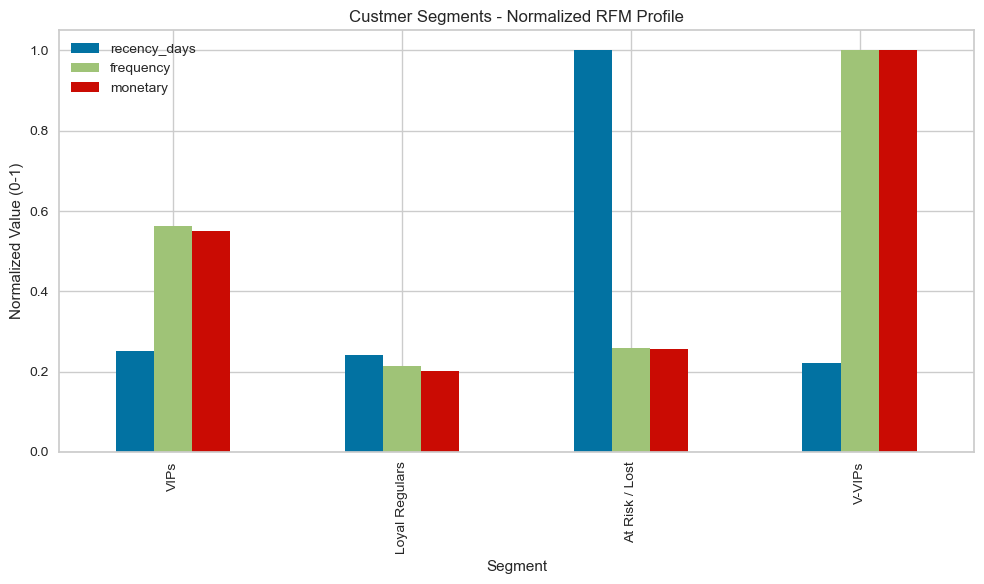

In [79]:
df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = (
    df_plot[['recency_days', 'frequency', 'monetary']].apply(lambda x: x /x.max())
)

df_plot.set_index('Segment')[['recency_days', 'frequency', 'monetary']].plot(kind='bar', figsize=(10,6))
plt.title('Custmer Segments - Normalized RFM Profile')
plt.ylabel('Normalized Value (0-1)')
plt.tight_layout()
plt.show()